# Programming for Data Analysis Project
### Data Set Simulation: Healthy Ireland Survey 2019

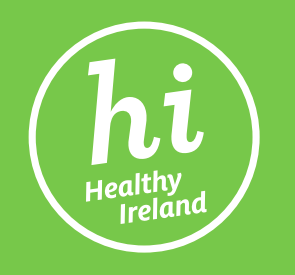 

### Submission Date : 03/01/2022

#### Introduction

The aim of this project is to simulate data using Python that mirrors a real-world phenomenon. The following Python modules are used to simulate and investigate the dataset and the relationships between its dependent and independent variables:
- NumPy Random
- SciPy Stats
- Pandas
- Matplotlib Pyplot/Seaborn

The phenomenon I've chosen is the general health of the Irish population, and the simulation is based largely on the results of the 2019 Healthy Ireland survey. This is an annual, interviewer-administered, face to face study commissioned by the Department of Health, and is part of the Healthy Ireland framework to improve the health and wellbeing of people living in Ireland. 

Its main objectives are: 
- To provide current and credible data to monitor the efficacy of other Healthy Ireland framework initiatives 
- To ensure Ireland meets its international reporting requiremnts
- Support the Department of Health in policy prioritization and awareness-raising initiatives

The survey covers a wide range of topics including physical measurements, alcohol and tobacco consumption, general health, sleep quality and physical activity levels. 

I chose this survey as the basis for the simulated dataset as my undergraduate degree was in Nutritional Science, with a strong emphasis on the relationship between diet and public health. Although I no longer work in this area, I have maintained a strong interest in it.

The simulation has three main components:
- Demographic Factors (independent variables) - age, gender, employment and socioeconomic status
- Health Outcomes  (dependent variables) - BMI, physical activity levels, alcohol consumption, smoking status, hours sleep. 
- Relationship between independent and dependent Variables, based on figures reported in the Healthy Ireland survey

In summary, this project will simulate the data provided by the Healthy Ireland survey respondents, and recreate the relationships between demographic factors and reported health outcomes.

#### Part 1: Simulating Independent Variables

##### Survey Respondents 

The Healthy Ireland survey is administered annually to a representative sample of the Irish population. Approximately 7500 people aged 15 or over participated in 2019. 

Participating households are selected using a multistage sampling process that results in all households in Ireland having an equal chance of selection. Households were divided into equal-sized quintiles based on deprivation index, with the first quintile representing the most deprived area and the fifth quintile representing the most affluent area.  

From each of the randomly selected households, one member aged 15 or older is chosen to participate. Survey respondents are weighted to ensure the sample is representative of the Irish population in terms of age group, sex and region.

Therefore, the first task in this simulation is to generate a respondent sample that mirrors the survey design and Irish population. As regional differences in health outcomes did not feature significantly in the Healthy Ireland report, this variable was excluded. The main demographic variablees of interest were gender, age, employment and deprivation index.

##### 1. Gender

First, the proportion of females to males was calculated, as the female population of Ireland is slightly higer than the male.

The total male/female respondents wasn't included in the Healthy Ireland survey, so this was extrapolated from 2016 census data.

The below code reads a CSV file downloaded from the CSO website containing the 2016 population figures by gender and regional authority. It filters on the state-level figures for males and females and calculates the percentage for each of these. 

In [43]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import skewnorm
from scipy.stats import gamma
from scipy.stats import expon

np.random.seed(seed = 1234)

total_pop = pd.read_csv('Population by Gender 2016.csv')
total_pop = total_pop.rename(columns = {"VALUE": "Population"})
whole_country = total_pop.loc[total_pop['Regional Authority'] == 'State']
male_pop = whole_country.loc[whole_country["Sex"] == "Male"]
female_pop = whole_country.loc[whole_country["Sex"] == "Female"]
percentage_females = female_pop["Population"].values/(female_pop["Population"].values + male_pop["Population"].values) * 100
percentage_males = 100 - percentage_females
print("\n")
print("Total percentage of female Irish population : {}".format(percentage_females))
print("Total percentage of male Irish population  : {}".format(percentage_males))
print("\n")



Total percentage of female Irish population : [50.55659915]
Total percentage of male Irish population  : [49.44340085]




Once the relative proportions for both genders were established, the next step was to generate corresponding data. The below code uses the np.random.choice() function to generate an array with 7500 elements. Each element is assigned a value of "male" or "female" and the probability of assignment for each is based on the population breakdown from the previous section. 

[['Female' '3792']
 ['Male' '3708']]




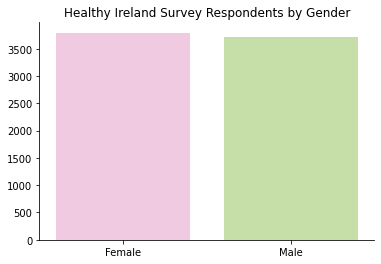

In [45]:
np.random.seed(seed = 1234)

#Generate male/female data points based on probab
genders = ["Female", "Male"]
gender = np.random.choice(a = genders, size = 7500, p = [0.51, 0.49])
unique, counts = np.unique(gender, return_counts = True)
print (np.asarray((unique, counts)).T)
print("\n")

#Barplot showing male/female breakdown
sns.barplot(x = unique, y = counts, palette="PiYG")
plt.title("Healthy Ireland Survey Respondents by Gender")
sns.despine()
plt.show()
plt.close()

As the above output shows, the proportions of male and female respondents are roughly equivalent to the overall population distribution. 

##### 2. Age

As was the case for gender, the exact age breakdown of the survey participants was not provided in the Healthy Ireland report. The age distribution was estimated based on 2016 census data.

According to the census, the median age of the Irish population is 37.48. On the CSO website, there is a pyramind showing a breakdown of the Irish population by age.

[Link to CSO figure]("https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/assr/")

This figure appears to have two peaks, one at the age of about 7 and another at about 37. 

As we are only concered with individuals aged 15 and over for this simulation, a truncated normal distribution was chosen to model the age profile of the respondents. This is a variation of the normal distribution where the domain (x values) are restricted to a certain range. This distribution takes four parameters:
 - Mean
 - Standard deviation
 - Upper bound value)
 - Lower bound value
 
Applying the truncated normal distribution to the age variable allows us to set an upper limit of 100 and a lower limit of 15, while maintaining the peak at 37 seen in the CSO figure. 

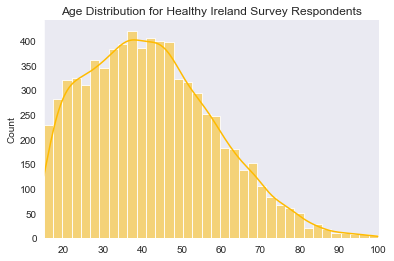

In [80]:
from scipy.stats import truncnorm
np.random.seed(seed = 1234)


#Mean, standard devation and upper and lower limits
#20 was chosen as the standard deviation to replicate the variation seen in the CSO population pyramid
my_mean = 37.4
my_std = 20
myclip_a = 15
myclip_b = 100

#From the scipy stats docs - a and b are shape parameters for the truncnorm distribution
#The below formula can be used to obtain shape parameters for a and b with a given mean, std and upper and lower bound values
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
age_dist = truncnorm.rvs(a,b, loc = 37.4, scale = 20, size = 7500)

fig, ax = plt.subplots()
sns.histplot(age_dist, kde = True, color = "#ffbb00", edgecolor = "white")
sns.set_style("dark")
plt.title("Age Distribution for Healthy Ireland Survey Respondents", fontsize = 12)
plt.xlim([15, 100])
sns.despine()
plt.show()
plt.close()